Name: Haniyeh Ehsani

Student Number: 97101191

# Q1

<div dir='rtl'>
    ابتدا تصویر را می‌خوانیم.
</div>

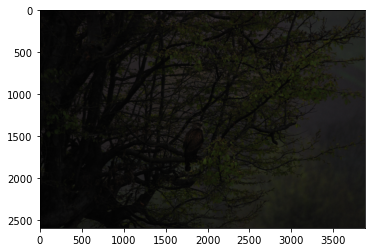

In [412]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Enhance1.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

<div dir='rtl'>
    تصویر خوانده شده با فرمت
    BGR
    است. بنابراین آن را به 
    RGB
    تبدیل می‌کنیم. همچنین تصویر خیلی تاریک است. برای درست کردن این موضوع از
    log transformation
    استفاده می کنیم تا تصویر را روشن‌تر کنیم. این
    transformation
    پیکسل‌های تاریک‌تر را بیشتر از پیکسل‌های روشن، روشن می‌کند.
    <br>
    همچنین به طور حسی آلفا مساوی با ۰.۵ تصویر را به طرز معقولی روش می‌کند. تصویر خروجی نه خیلی تاریک خواهد بود و نه خیلی روشن.
</div>

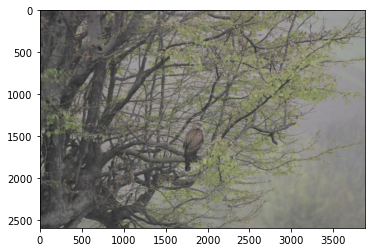

In [413]:
# log transformation
alpha = 0.5
log_transformed = np.uint8(255 / np.log(1 + 255 * alpha) * np.log(1 + alpha * img))
plt.imshow(log_transformed);

<div dir='rtl'>
تصویر کمی ناواضح به نظر می‌رسد. به همین دلیل باید کنتراست آن را کمی زیاد کنیم. برای این کار از 
    equalizeHist
    مطابق توضیحات اسلاید استفاده می‌کنیم.
</div>

In [418]:
# equalize hist function
def equalize_hist(img):
    # calculate histogram
    hist = np.zeros(256)
    flatten = img.flatten()
    for intensity in flatten:
        hist[intensity] += 1
    
    # normalize hist
    normalized_hist = hist/sum(hist)
    
    # cummulative sum
    cumsum_hist = np.cumsum(normalized_hist)
    
    # create lookup table for new intensities 
    new_intensities = np.floor(255 * cumsum_hist)
    
    # creating equalized hist image
    shape = img.shape
    img = img.flatten()
    new_img = np.array([new_intensities[item] for item in img], dtype=np.uint8)
    new_img = new_img.reshape(shape)
            
    return new_img

<div dir='rtl'>
    برای پیاده‌سازی 
    equalize_hist
    ابتدا 
    histogram
    اصلی تصویر را ساخته و سپس
    normalized cummulative sum
    این 
    histogram
    را به دست می‌آوریم.
    این توزیع به دست آمده همان توزیع
    intensity
    تصویر اولیه ما است. برای 
    equalize
    کردن کافی است این توزیع که قبلا روی بازه کوچکی اعمال شده بوده روی بازه ۰ تا ۲۵۵ اعمال کنیم.
    بنابراین این توزیع را ضربدر ۲۵۵ می‌کنیم و مقادیر
    intensity
    جدید حاصل می‌شود. سپس با توجه به مقدار
    intensity
    پیشین، مقادیر
    intensity
    جدید را به دست می‌آوریم.
    <br>
    همچنین به این علت که تصویر ورودی تابع ما سیاه و سفید است، باید سه کانال تصویر را از یکدیگر جدا کنیم و روی هر یک به صورت جداگانه این تابع را اعمال کنیم. در انتها آن را مرج کرده و تصویر را نمایش می‌دهیم. بنابراین مطابق کد زیر عمل می‌کنیم.
</div>

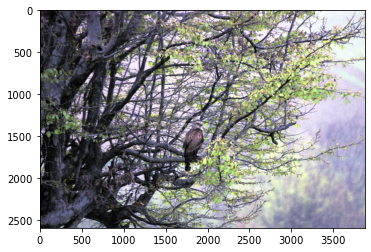

In [419]:
# equalize hist
r, g, b = cv2.split(log_transformed)
rt, gt, bt = equalize_hist(r), equalize_hist(g), equalize_hist(b)
img = cv2.merge((rt, gt, bt))
plt.imshow(img);

In [69]:
# save image
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res01.jpg", img)

True

<div dir='rtl'>
    حال برای ذخیره کردن تصویر باید آن را دوباره به فرمت
    BGR
    تبدیل کنیم. سپس آن را ذخیره می‌کنیم.
</div>

# Q2

<div dir='rtl'>
    ابتدا تصویر را می‌خوانیم.
</div>

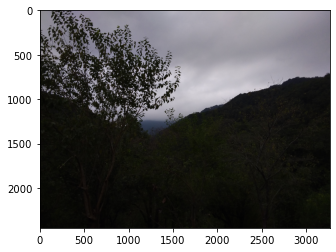

In [420]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Enhance2.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

<div dir='rtl'>
مشابه قسمت قبل سعی می‌کنیم تصویر را روشن‌تر کنیم. اما این سوال با قسمت قبل فرق دارد. در اینجا آسمان روشن‌تر است، لذا نمی‌توانیم کل تصویر را یک جا روشن کنیم. به همین دلیل سعی می‌کنیم شرطی بگذاریم که آسمان کمتر روشن شود. می‌دانیم
    alpha
    هر چه بیشتر باشد، تصویر بیشتر روشن می‌شود؛
    بنابراین
    log_transform
    با
    alpha = 0.09
    را روی قسمت‌های تاریک و 
    log_transform
    با
    alpha = 0.025
    را روی قسمت‌های روشن اعمال می‌کنیم.
    <br>
    کار دیگری که می‌شد انجام داد این بود که از 
    Power-law transform
    برای بخش‌های روشن‌تر استفاده کرد که
    intensity
    های آن ها به بخش‌های تیره‌تر نزدیک‌تر شود و سپس افزایش کنتراست اعمال شود.
</div>

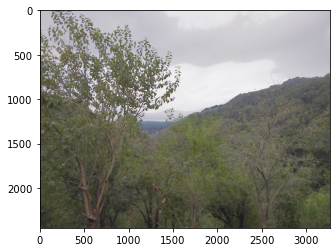

In [421]:
# conditional log transformation
alpha = 0.2
beta = 0.03
r, g, b = cv2.split(img)
rt = np.where((r + g + b)/3 < 40, np.uint8(255 / np.log(1 + 255 * alpha) * np.log(1 + alpha * r)),
              np.uint8(255 / np.log(1 + 255 * beta) * np.log(1 + beta * r)))
gt = np.where((r + g + b)/3 < 40, np.uint8(255 / np.log(1 + 255 * alpha) * np.log(1 + alpha * g)),
             np.uint8(255 / np.log(1 + 255 * beta) * np.log(1 + beta * g)))
bt = np.where((r + g + b)/3 < 40, np.uint8(255 / np.log(1 + 255 * alpha) * np.log(1 + alpha * b)),
              np.uint8(255 / np.log(1 + 255 * beta) * np.log(1 + beta * b)))
log_transformed = cv2.merge((rt, gt, bt))
plt.imshow(log_transformed);

<div dir='rtl'>
    حال مشابه سوال قبل باید از 
    equalize_hist
    برای با کیفیت کردن تصویر استفاده می‌کنیم. برای توضیحات بیشتر به توضیحات سوال قبل مراجعه کنید.
</div>

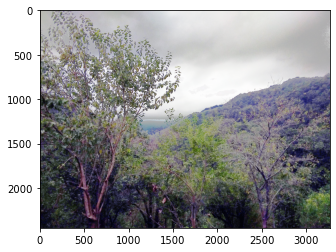

In [422]:
# equalize hist function
def equalize_hist(img):
    # calculate histogram
    hist = np.zeros(256)
    flatten = img.flatten()
    for intensity in flatten:
        hist[intensity] += 1
    
    # normalize hist
    normalized_hist = hist/sum(hist)
    
    # cummulative sum
    cumsum_hist = np.cumsum(normalized_hist)
    
    # create lookup table for new intensities 
    new_intensities = np.floor(255 * cumsum_hist)
    
    # creating equalized hist image
    shape = img.shape
    img = img.flatten()
    new_img = np.array([new_intensities[item] for item in img], dtype=np.uint8)
    new_img = new_img.reshape(shape)
            
    return new_img

rtt, gtt, btt = equalize_hist(rt), equalize_hist(gt), equalize_hist(bt)
img = cv2.merge((rtt, gtt, btt))
plt.imshow(img);

<div dir='rtl'>
همانطور که مشاهده می‌کنید تصویر روشن شده‌است. اما نه آنقدر که ابرهای آسمان مشخص نباشند. حال تصویر را ذخیره می‌کنیم.
</div>

In [113]:
# save image
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res02.jpg", img)

True

# Q3

<div dir='rtl'>
    ابتدا تصویر را با استفاده از کتابخانه 
    tiffile
    می‌خوانیم.
</div>

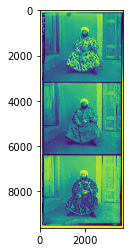

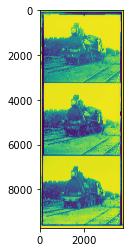

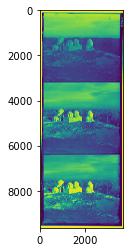

In [3]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tifffile as tiff
amir = tiff.imread('amir.tif') # master-pnp-prok-01800-01886a
train = tiff.imread('train.tif') # master-pnp-prok-01800-01833a
mosque = tiff.imread('mosque.tif') # master-pnp-prok-00400-00458a
plt.imshow(amir)
plt.show()
plt.imshow(train)
plt.show()
plt.imshow(mosque)
plt.show();

<div dir='rtl'>
    حال باید کاری کنیم که سه بخش تصویر از هم جدا شوند. برای این کار تابع 
    separate
    را به صورت زیر تعریف می‌کنیم
    و تلاش می‌کنیم تا یک بار کانال‌ها را روی هم بیندازیم تا ببینیم چه نتیجه‌ای حاصل می‌شود. برای این که تصویر بتواند نمایش داده شود باید آن را به مبنای
    uint8
    ببریم. برای این کار باید مقادیر پیکسل‌ها را تقسیم بر
    2^8
    یا
    256
    کنیم.
</div>

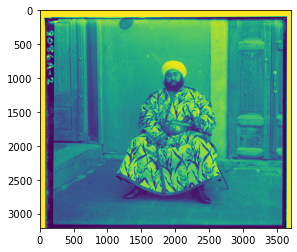

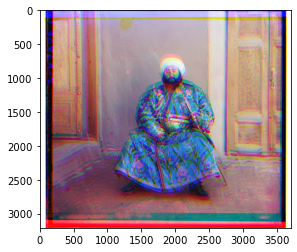

In [408]:
# separate the channels
def separate(img):
    return img[:len(img)//3], img[len(img)//3:2*(len(img)//3)], img[2*(len(img)//3):3*(len(img)//3)]

b, g, r = separate(amir)
plt.imshow(b)
plt.show();
img = cv2.merge((r, g, b))
img = np.array(img/256, dtype=np.uint8)
plt.imshow(img);

<div dir='rtl'>
    یک تابع
    convert_to_uint8
    می‌زنیم برای زمانی که می‌خواهیم تصویر را در هر مرحله نمایش دهیم. این تابع تصاویر ۱۶ بیتی را به ۸ بیتی می‌برد.
    <br>
    تابع
    show_img
    برای نمایش تصویر است.
    <br>
    تابع
    sum_of_error
     جمع قدر مطلق اختلاف دو کانال را (که در این جا دو کانال را شارپ کردیم تا نتیجه بهتری بگیریم؛ البته این کار زمان اجرا را کند خواهد کرد) به دست می‌آورد.
    همچنین به تجربه نشان داده شد که 
    SSE
    از جمع قدر مطلق اختلاف بهتر عمل می‌کند.
    <br>
    تابع
    smooth
    برای به دست آوردن حالت 
    smooth
    تصویر و سپس شارپ کردن آن کاربرد دارد. برای این منظور از یک 
    box filter
    ۳ در ۳ استفاده کردیم.
    <br>
    حال به توضیح تابع 
    prokudin_gorskii
    می‌پردازیم که عمده کار در این بخش صورت گرفته است.
    ما برای حل مسئله این طور در نظر گرفتیم که تصویر در هر مرحله یک پنجم می‌شود و تابع را بازگشتی با یک شرط در نظر گرفتیم که بیشتر از یک حدی تصویر کوچک نشود؛ چرا که در این صورت تصویر عمده اطلاعات خود را از دست داده و شیفت دادن سودی نخواهد داشت. بنابراین درصورتی که 
    شرط مذکور برقرار نباشد، تابع بازگشتی دیگر صدا زده نخواهد شد.
    همچنین میزان شیفت به دست آمده در تصویر ریسایز شده را باید تقسیم بر
    scale
    که یک پنجم است یا به بیان دیگر ۵ کنیم، که میزان شیفت برای تصویر ریسایز نشده همخوان شود.
    برای شیفت هم از تابع
    np.roll()
    استفاده کردیم.
    این تابع آرایه را شیفت نمی‌دهد و برای این که تبدیل به شیفت شود، باید به میزان شیفت خانه‌های آرایه 
    roll
    شده را صفر قرار دهیم.
    برای تغییر سایز تصویر از تابع
    cv2.resize()
    استفاده کردیم و این تغییر سایز را روی تمام کانال‌ها اعمال کردیم.
    مطابق چیزی که در توضیحات سوال داده شده است، هر بار یک کانال را آنقدر شیفت می‌دهیم تا با کانال قرمز همتراز شود.
    source_color
    برای تشخیص کانال مذکور قرار داده شده است که بتوانیم تصویر را در هر مرحله نمایش دهیم.
    برای به دست آوردن بهترین شیفت، یک فور تو در تو قرار می‌دهیم که تصویر را در جهت
    x
    و
    y
    به صورت همزمان شیفت دهیم.
    همچنین میزان شیفت را حداکثر 
    (1/scale)
    در نظر می‌گیریم.
    سپس تابع
    prokudin_gorskii
    را یک بار روی کانال سبز و بار دیگر روی کانال آبی صدا می‌زنیم. سپس کانال‌های به دست آمده را با هم مرج می‌کنیم و تصویر مورد نظر به دست می‌آید.
    در ادامه باید حاشیه تصویر را به صورت اتومات حذف کنیم.
</div>

In [219]:
def convert_to_uint8(r, g, b):
    img = cv2.merge((r, g, b))
    return np.array(img/256, dtype=np.uint8)


def show_img(r, g, b):
    img = convert_to_uint8(r, g, b)
    plt.imshow(img)
    plt.show()


def sum_of_error(source, target):
    return np.sum(((source - smooth(source)) - (target - smooth(target)))**2)


def smooth(img):
    box_filter = np.ones((4, 4)) / 16
    return cv2.filter2D(img, -1, box_filter)


def shift(img, i, j):
    img = np.roll(img, i, axis=0)
    img = np.roll(img, j, axis=1)

    if i > 0:
        img[:i] = 0
    elif i < 0:
        img[img.shape[0] + i:] = 0
    if j > 0:
        img[:, :j] = 0
    elif j < 0:
        img[:, img.shape[1] + j:] = 0
    return img


def prokudin_gorskii(target, source, other_channel, source_color, scale=0.2):
    res_x_shift, res_y_shift = 0, 0
    past_y_shift, past_x_shift = 0, 0
    if np.min(target.shape) > 400:
        dim = (int(source.shape[1] * scale), int(source.shape[0] * scale))
        resized_target = cv2.resize(target, dim, interpolation=cv2.INTER_AREA)
        resized_source = cv2.resize(source, dim, interpolation=cv2.INTER_AREA)
        resized_other_channel = cv2.resize(other_channel, dim, interpolation=cv2.INTER_AREA)
        res_x_shift, res_y_shift, _ = prokudin_gorskii(resized_target, resized_source, resized_other_channel, source_color, scale)
        res_x_shift, res_y_shift = int(res_x_shift/scale), int(res_y_shift/scale)
        source = shift(source, res_y_shift, res_x_shift)

    x_shift = 0
    y_shift = 0
    free = (1/scale)
    min_error = sum_of_error(source, target)
    best_source = source
    for i_shift in range(-int(free), int(free + 1)):
        for j_shift in range(-int(free), int(free + 1)):
            source_shifted = shift(source, i_shift, j_shift)
            if sum_of_error(source_shifted, target) < min_error:
                min_error = sum_of_error(source_shifted, target)
                best_source = source_shifted
                y_shift = res_y_shift + i_shift
                x_shift = res_x_shift + j_shift
                
    source = best_source
        
    if source_color == 'g':
        show_img(target, source, other_channel)
    else:
        show_img(target, other_channel, source)
    return x_shift, y_shift, source

<div dir='rtl'>
    حال تابع register را به صورت زیر می‌سازیم.
    این تابع یک بار کانال سبز را جا به جا می‌کند و بار دیگر کانال آبی تا سر جای مطلوب خود قرار بگیرند. همچنین میزان شیفت داده شده برای هر کانال چاپ می‌شود.
</div>

In [400]:
def register(img):
    b, g, r = separate(img)
    print("channel green:")
    x_shift, y_shift, g = prokudin_gorskii(r, g, b, 'g')
    print("Shift in direction of x:", x_shift, ", Shift in direction of y:", y_shift)
    print("channel blue:")
    x_shift, y_shift, b = prokudin_gorskii(r, b, g, 'b')
    print("Shift in direction of x:", x_shift, ", Shift in direction of y:", y_shift)
    return convert_to_uint8(r, g, b)

<div dir='rtl'>
    رجیستر را برای تصویر قطار مشاهده می‌کنید:
</div>

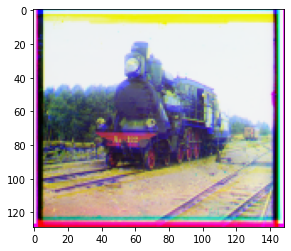

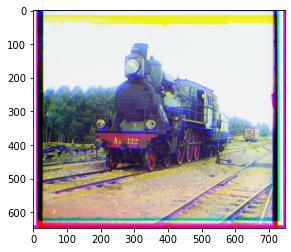

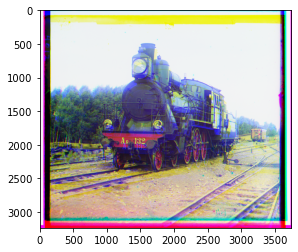

Shift in direction of x: -21 Shift in direction of y: -43


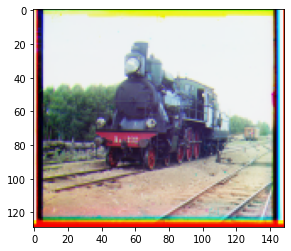

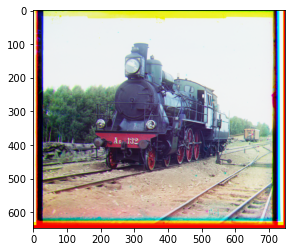

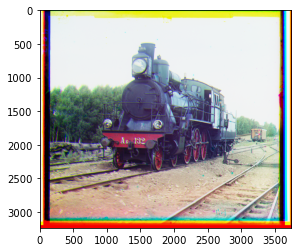

Shift in direction of x: -33 Shift in direction of y: -95


In [404]:
train_reg = register(train)

<div dir='rtl'>
    برای تشخیص حاشیه تصویر به شکل زیر عمل می‌کنیم.
    اول یک تابع
    derivative
    یا مشتق در نظر گرفته و مشتق را روی محو
    x
    و همچنین روی محور 
    y
    به دست می‌آوریم.
    رادیکال جمع این دو مشتق به توان دو گرادیان ما خواهد بود.
    سپس روی یک ردیف و یا ستون دلخواه (به طور مثال ستون و ردیف وسط) مشتق را در نظر می‌گیریم. یک شهود اولیه داریم که طبق آن حاشیه در یک بیستم طول و عرض تصویر قرار دارد. همچنین با کمی امتحان و خطا متوجه می‌شویم که همین که مقدار مشتق از یک بیشتر باشد کافی است. بنابراین مشابه زیر می‌توانیم حاشیه‌های تصویر را به دست آوریم. دقت کنید که فرض کردیم اختلاف دو سر بازه حاشیه حداقل دو سوم برابر طول و یا عرض تصویر خواهد بود. 
</div>

In [394]:
def derivative(img):
    filter_x = np.array([[-1, 0, 1]])
    filter_y = filter_x.T
    dx = cv2.filter2D(img, -1, filter_x)
    dy = cv2.filter2D(img, -1, filter_y)
    grad = np.sqrt(dx**2 + dy**2)
    return grad


def get_margin(img):
    r, g, b = cv2.split(img)
    dv = derivative((r + g + b)/3)
    last = 0
    le, ri, up, do = 0, 0, 0, 0
    for i, x in enumerate(dv[img.shape[1]//2]):
        if (i < img.shape[1] / 20 or i > img.shape[1] * 19 / 20) and (x > 1):
            if last < img.shape[1] / 20:
                le, ri = last, img.shape[1]
            if i - last > 2/3 * img.shape[1]:
                le, ri = last, i
            last = i
            
    last = 0
    for i, x in enumerate(dv.T[img.shape[0]//2]):
        if (i < img.shape[0] / 20 or i > img.shape[0] * 19 / 20) and (x > 1):
            if last < img.shape[0] / 20:
                up, do = last, img.shape[0]
            if i - last > 2/3 * img.shape[0]:
                up, do = last, i
            last = i
    return le, ri, up, do

<div dir='rtl'>
    تصویر کراپ شده برای قطار را مشاهده می‌کنید:
</div>

True

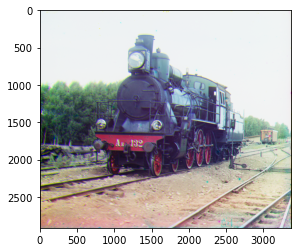

In [398]:
l, r, u, d = get_margin(train_reg)
cropped = train_reg[u:d, l:r]
plt.imshow(cropped);
img = cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR)
cv2.imwrite("res05-Train.jpg", img)

<div dir='rtl'>
    رجیستر را برای تصویر مقبره مشاهده می‌کنید:
</div>

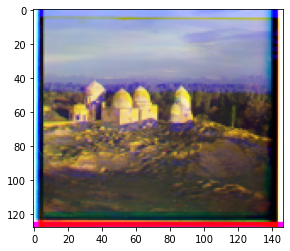

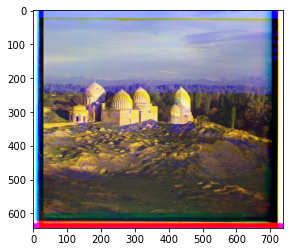

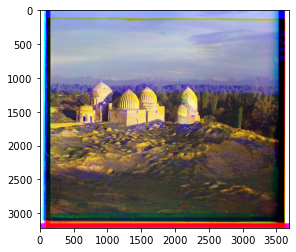

Shift in direction of x: -2 Shift in direction of y: -69


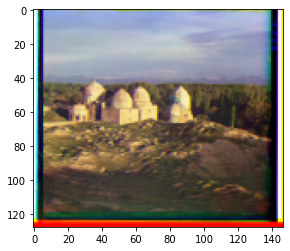

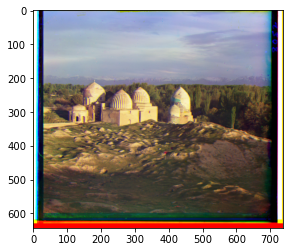

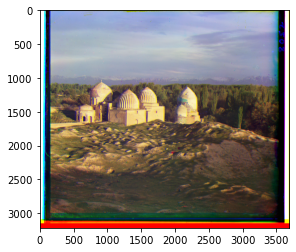

Shift in direction of x: -19 Shift in direction of y: -128


In [405]:
mosque_reg = register(mosque)

<div dir='rtl'>
    تصویر کراپ شده برای مقبره را مشاهده می‌کنید:
</div>

True

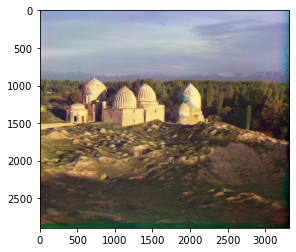

In [399]:
l, r, u, d = get_margin(mosque_reg)
cropped = mosque_reg[u:d, l:r]
plt.imshow(cropped);
img = cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR)
cv2.imwrite("res04-Mosque.jpg", img)

<div dir='rtl'>
    رجیستر را برای تصویر امیر مشاهده می‌کنید:
</div>

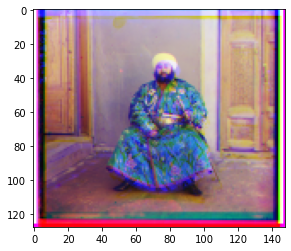

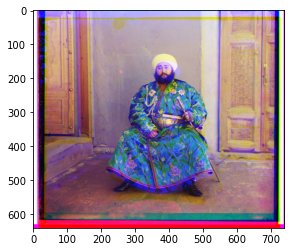

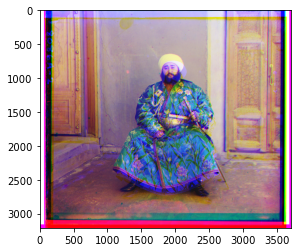

Shift in direction of x: -24 Shift in direction of y: -53


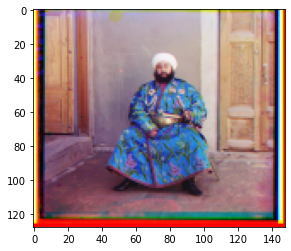

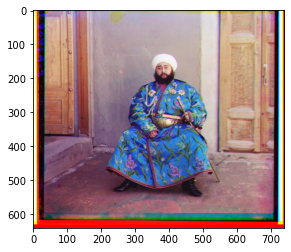

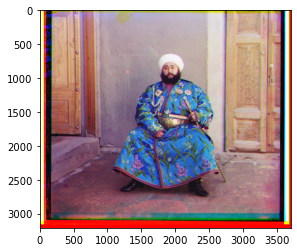

Shift in direction of x: -35 Shift in direction of y: -100


In [406]:
amir_reg = register(amir)

<div dir='rtl'>
    تصویر کراپ شده برای امیر را مشاهده می‌کنید:
</div>

True

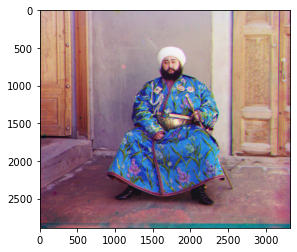

In [397]:
l, r, u, d = get_margin(amir_reg)
cropped = amir_reg[u:d, l:r]
plt.imshow(cropped);
img = cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR)
cv2.imwrite("res03-Amir.jpg", img)

# Q4

<div dir='rtl'>
    ابتدا تصویر را می‌خوانیم.
</div>

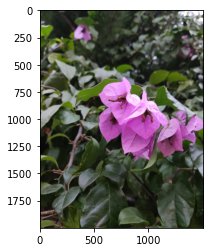

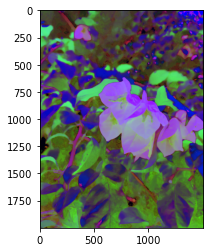

In [26]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Flowers.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img);
plt.show();
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img);

<div dir='rtl'>
    مقدار
    hsv
    رنگ‌های صورتی و زرد را چاپ می‌کنیم تا ایده‌ای درمورد مقدار 
    h
    آن‌ها به دست آوریم.
</div>

In [27]:
# hsv of wanted colors
pink_or_red = np.uint8([[[128, 0, 255]]]) # found in internet
hsv_pink = cv2.cvtColor(pink_or_red, cv2.COLOR_RGB2HSV)

yellow = np.uint8([[[255, 128, 0]]]) # found in internet
hsv_yellow = cv2.cvtColor(yellow, cv2.COLOR_RGB2HSV)
print(hsv_pink, hsv_yellow)

[[[135 255 255]]] [[[ 15 255 255]]]


<div dir='rtl'>
    همانطور که دیدید یک رنگ صورتی عادی نزدیک ۱۳۵ شد، می‌توانیم یک شرط برای مقادیر
    hue
    بیشتر از ۱۳۵ در نظر بگیریم، زیرا رنگ‌های صورتی و قرمز در این رنج قرار دارند و با توجه به آن 
    hue
    را به مقدار ۱۵ که معادل با رنگ زرد است نزدیک کنیم. بنابراین کانال‌های مختلف را از هم جدا می‌کنیم و برای 
    hue
    مقادیر بیشتر از ۱۳۵ را ۱۲۰ تا کم می‌کنیم، سپس دوباره مرج کرده و مطابق کد زیر عمل می‌کنیم:
</div>

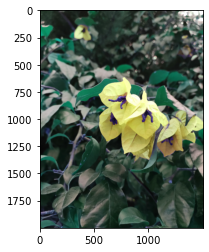

In [28]:
# convert pink color to yellow
h, s, v = cv2.split(img)
ht = np.where(h > 135, h - 120, h)
yellow_img = cv2.merge((ht, s, v))
rgb_img = cv2.cvtColor(yellow_img, cv2.COLOR_HSV2RGB);
plt.imshow(rgb_img);

<div dir='rtl'>
    همانطور که دیدید رنگ گلبرگ‌ها به زرد تغییر کرد. حال برای 
    blur
    کردن، روی تصویری که در فضای 
    rgb
    است
    gaussian blur
    اعمال می‌کنیم.
    <br>
    پس از مشاهده نتیجه این قسمت را با قسمت قبلی ادغام می‌کنیم.
</div>

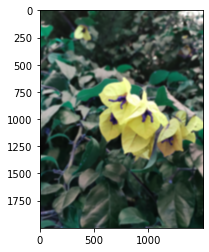

In [38]:
# blur image using gaussian filter
def blur(img):
    shape, sigma = 20, 10
    gauss_filter_x = np.array([np.exp(-(i - shape//2)**2 / (2 * sigma**2)) for i in range(shape)])
    gauss_filter_x = gauss_filter_x /  sum(gauss_filter_x)
    gauss_filter_x = gauss_filter_x.reshape((1, shape))
    gauss_filter_y = gauss_filter_x.reshape((shape, 1))
    blurred_img = cv2.filter2D(img, -1, gauss_filter_x)
    blurred_img = cv2.filter2D(blurred_img, -1, gauss_filter_y)
    return blurred_img
    
r, g, b = cv2.split(rgb_img)
rt, gt, bt = blur(r), blur(g), blur(b)
blurred_img = cv2.merge((rt, gt, bt))
plt.imshow(blurred_img);

<div dir='rtl'>
    مطابق اسلاید فیلتر گاوسی را به دو فیلتر افقی و عمودی تقسیم می‌کنیم تا سرعت محاسبه بالا رود و هر یک را با استفاده از تابع 
    filter2D
    روی تصویر اعمال می‌کنیم تا تصویر خروجی به دست آید. برای به دست آوردن مقادیر فیلتر گاوسی هم از تعریف تابع گاوس استفاده می‌کنیم.
    <br>
    در ادامه دو قسمت قبلی را با هم ترکیب می‌کنیم تا جواب مسئله حاصل شود. شرط
    blur 
    کردن همان شرط برای تغییر رنگ یا
    h > 135
    است.
    برای 
    h > 135
    مقادیر تغییر رنگ داده شده قرار می‌گیرد و برای سایر
    مقادیر 
    blur
    شده.
</div>

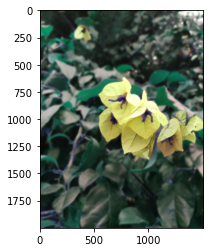

In [39]:
# blur and changing color together
rtt = np.where(h > 135, r, rt)
gtt = np.where(h > 135, g, gt)
btt = np.where(h > 135, b, bt)
result = cv2.merge((rtt, gtt, btt))
plt.imshow(result);

<div dir='rtl'>
    حال تصویر را ذخیره می‌کنیم.
</div>

In [40]:
# save image
img = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
cv2.imwrite("res06.jpg", img)

True

# Q5

<div dir='rtl'>
    ابتدا تصویر را می‌خوانیم.
</div>

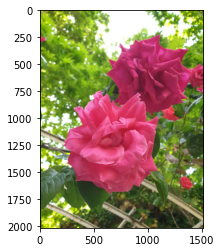

In [107]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

img = cv2.imread('Pink.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img);

first approach's execution time: 0.015042781829833984 seconds


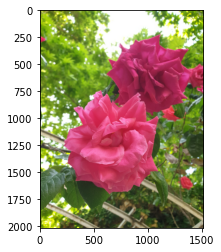

In [113]:
# first approach
box_filter = np.ones((3, 3)) / 9
start_time = time.time()
blurred_img = cv2.filter2D(img, -1, box_filter)
end_time = time.time()
print("first approach's execution time:", end_time - start_time, "seconds")
plt.imshow(blurred_img);

<div dir='rtl'>
    روش اول که بسیار ساده است را همانطور که دیدید پیاده‌سازی کردیم. یک فیلتر ۳ در ۳ با مقادیر
    1/9
    را می‌سازیم با استفاده از تابع
    filter2D
    روی تصویر اعمال می‌کنیم و سپس آن را ذخیره می‌کنیم.
    این روش
    0.015042781829833984
    ثانیه طول کشید. البته چیزی که باید توجه شود این است که تصویر نتیجه هم‌اندازه تصویر خودمان خواهد بود؛ پس برای اینکه فقط پیکسل‌هایی که روی آن‌ها فیلتر اعمال شده است را در نظر بگیریم، تصویر را باید کوچک‌تر کرده و سپس سیو کنیم.
    بنابراین خواهیم داشت:
</div>

(2016, 1512, 3) (2016, 1512, 3)
(2016, 1512, 3) (2014, 1510, 3)


True

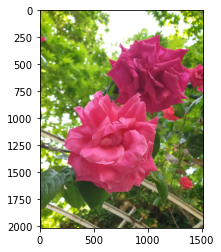

In [114]:
# removing excessive rows and columns
print(img.shape, blurred_img.shape)
blurred_img = blurred_img[1:-1, 1:-1]
print(img.shape, blurred_img.shape)
plt.imshow(blurred_img);
blurred_img = cv2.cvtColor(blurred_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res07.jpg", blurred_img)

<div dir='rtl'>
    حال روش دوم را انجام می‌دهیم. یعنی روی هر کانال به طور جداگانه کانولوشن می‌زنیم.
</div>

second approach's execution time: 99.9298586845398 seconds


True

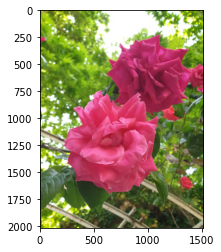

In [111]:
# second approach
blurred_img = np.zeros(img.shape, dtype='uint8')
start_time = time.time()
for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        # convolution
        blurred_img[i][j][0] = np.sum(img[i-1:i+2, j-1:j+2, 0])//9
        blurred_img[i][j][1] = np.sum(img[i-1:i+2, j-1:j+2, 1])//9
        blurred_img[i][j][2] = np.sum(img[i-1:i+2, j-1:j+2, 2])//9
blurred_img = blurred_img[1:-1, 1:-1]
end_time = time.time()
print("second approach's execution time:", end_time - start_time, "seconds")
plt.imshow(blurred_img);
blurred_img = cv2.cvtColor(blurred_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res08.jpg", blurred_img)

<div dir='rtl'>
    در این روش مشابه خواسته سوال، یک فور تودرتو با شروع از سمت چپ بالای تصویر می‌زنیم و روی خانه‌های سه‌تایی 
    box_filter
    را اعمال می‌کنیم.
    البته برای این که این عمل سریع‌تر شود خود 
    box_filter
    را تعریف نمی‌کنیم و صرفا خانه‌های جدول ۳ در ۳ را با هم جمع می‌کنیم و در انتها تقسیم بر ۹ می‌کنیم.
    البته این روش کندتر از روش قبل خواهد بود چون در روش قبل بهینه‌سازی‌هایی در تابع آماده صورت گرفته است.
    همچنین تصویر نهایی کوچک‌تر از تصویر اصلی خواهد بود چون فیلتر اعمال شده است و ما اطلاعات حاشیه تصویر را از دست داده‌ایم.
    زمان اجرا این الگوریتم 
    99.9298586845398 
    ثانیه شد.
    <br>
    حال سراغ روش سوم می‌رویم.
</div>

third approach's execution time: 0.3920269012451172 seconds


True

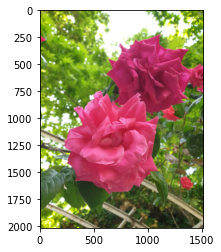

In [138]:
# third approach
start_time = time.time()
box_filter = [[1/9 for i in range(3)] for j in range(3)]

# calculate multiplication of each cell of box filter with image crops
for i in range(3):
    for j in range(3):
        box_filter[i][j] = box_filter[i][j] * img[i:img.shape[0]+i-2, j:img.shape[1]+j-2]
blurred_img = np.zeros((img.shape[0] - 2, img.shape[1] - 2, 3))

# calculate sum of box filter cells
for i in range(3):
    for j in range(3):
        blurred_img += box_filter[i][j]
blurred_img = np.array(blurred_img, dtype=np.uint8)
end_time = time.time()
print("third approach's execution time:", end_time - start_time, "seconds")
plt.imshow(blurred_img);
blurred_img = cv2.cvtColor(blurred_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res09.jpg", blurred_img)

<div dir='rtl'>
    در این روش باید هر خانه
    box_filter
    را معادل با عدد 
    1/9
    ضربدر زیرماتریس‌های تصویر اصلی در نظر بگیریم.
    واضح است که هر خانه
    box_filter
    روی تمامی پیکسل‌های تصویر اعمال نمی‌شود. مثلا برای خانه
    [0,0]
    هیچ گاه دو ردیف پایین و دو ستون سمت راست را مشاهده نمی‌کنیم. با محاسبات مشابه جداول دیگر را به دست می‌آوریم و مطابق خواسته سوال مقادیر این 
    box_filter
    را با هم جمع کرده و در انتها به تایپ
    uint8
    تبدیل می‌کنیم تا تصویر
    blur
    شده حاصل شود.
    مدت زمان این الگوریتم
    0.3920269012451172 
    ثانیه خواهد بود.
    توجه کنید که دو تا فور تو در تو که برای نوشتن این الگوریتم استفاده شده‌اند می‌توانند با هم ادغام شوند و اصلا نیازی به تغییر مقادیر
    box_filter
    هم نخواهد بود اما برای راحتی فهم کد به این شکل نوشته شده است.
    <br>
    در انتها نیز می‌توان مشاهده کرد که سرعت روش‌های یک و سه از دو بیشتر است.
</div>

# Q6

<div dir='rtl'>
    ابتدا تصاویر را می‌خوانیم.
</div>

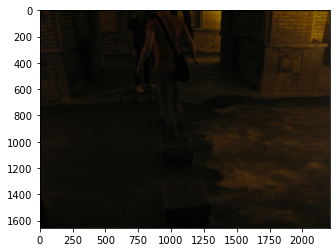

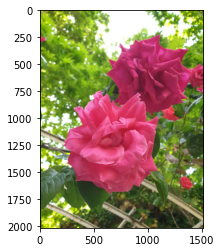

In [409]:
# import libraries and read image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import collections

dark_img = cv2.imread('Dark.jpg') 
dark_img = cv2.cvtColor(dark_img, cv2.COLOR_BGR2RGB);
plt.imshow(dark_img);
plt.show()

pink_img = cv2.imread('Pink.jpg') 
pink_img = cv2.cvtColor(pink_img, cv2.COLOR_BGR2RGB);
plt.imshow(pink_img);

<div dir='rtl'>
    حال برای این که بتوانیم 
    histogram matching 
    انجام دهیم،
    باید ابتدا
    equalized histogram
    هر دو تصویر را مشابه سوال‌های یک و دو به دست آوریم.
    برای توضیحات 
    equalized histogram
    به سوال یک مراجعه کنید.
    حال برای هر مقدار 
    intensity
    در تصویر 
    dark
    باید ببینیم که این مقدار 
    intensity
    چه مقداری در
    equalized histogram
    تصویر
    dark
    دارد و این مقدار به دست آمده را در برد
    equalized histogram
    تصویر
    pink
    جست و جو می‌کنیم و نزدیک‌ترین مقدار به آن را به دست می‌آوریم. حال که این نقطه را به دست آوردیم کافی است ببینیم که این مقدار در دامنه معادل با چه
    intensity
    می‌باشد و این 
    intensity
    را مقدار 
    intensity
    نهایی آن پیکسل از تصویر در نظر می‌گیریم.
    این کار را برای هر کانال رنگ به طور جداگانه انجام می‌دهیم.
    به این ترتیب 
    histogram matching
    مشابه تابع زیر خواهد بود. 
</div>

In [410]:
def histogram(img):
    hist = np.zeros(256)
    flatten = img.flatten()
    for intensity in flatten:
        hist[intensity] += 1
    return hist

def find_closest(value, array):
    
    # this function looks for closest value in array
    # if value exists in array; that value is the closest one
    if value in array:
        return value
    
    # find nearest value from the right
    save = value
    while value <= 255 and value not in array:
        value += 1
    increase_val = value
    if value not in array: # in case value = 255 is not in array
        increase_val = np.inf
        
    # find nearest value from the left
    value = save
    while value >= 0 and value not in array:
        value -= 1
    decrease_val = value
    if value not in array: # in case value = 0 is not in array
        decrease_val = np.inf
    value = save
    
    # find the nearest one
    _, value = min((abs(decrease_val - value), decrease_val), (abs(increase_val - value), increase_val))
    return value


def match_hist(pink, dark):
    
    # calculate equalized histogram of pink image
    hist = histogram(pink)
    normalized_hist = hist/np.sum(hist)
    pink_hist = np.floor(np.cumsum(normalized_hist) * 255)
    inverse_pink_hist = dict()
    for i in range(len(pink_hist)):
        inverse_pink_hist[pink_hist[i]] = i
    
    # calculate equalized histogram of dark image
    hist = histogram(dark)
    normalized_hist = hist/np.sum(hist)
    dark_hist = np.floor(np.cumsum(normalized_hist) * 255)
    
    # histogram matching
    flatten = dark.flatten()
    new_img = np.zeros(flatten.shape)
    for i, intensity in enumerate(flatten):
        value = find_closest(dark_hist[intensity], inverse_pink_hist)
        new_img[i] = inverse_pink_hist[value] 
    new_img = np.array(new_img, dtype=np.uint8)
    new_img = new_img.reshape(dark.shape)
            
    return new_img


rp, gp, bp = cv2.split(pink_img)
rd, gd, bd = cv2.split(dark_img)
rt, gt, bt = match_hist(rp, rd), match_hist(gp, gd), match_hist(bp, bd)
img = cv2.merge((rt, gt, bt))

<div dir='rtl'>
    در قسمت زیر هیستوگرام تصاویر و خود تصویر به دست آمده را مشاهده می‌کنید. همچنین در انتها پس از به دست آوردن تصویر آن را سیو می‌کنیم.
</div>

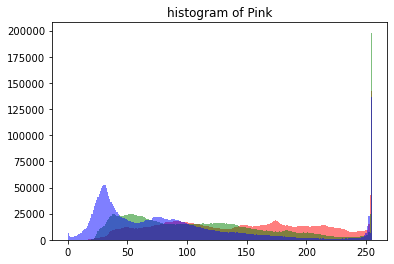

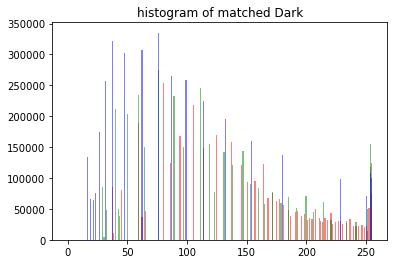

True

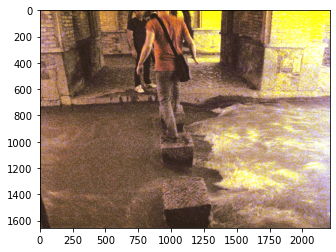

In [411]:
# histograms
plt.hist(x=np.arange(256), weights=histogram(rp), alpha=0.5, bins=256, color='r')
plt.hist(x=np.arange(256), weights=histogram(gp), alpha=0.5, bins=256, color='g')
plt.hist(x=np.arange(256), weights=histogram(bp), alpha=0.5, bins=256, color='b')
plt.title('histogram of Pink')
plt.show()
plt.hist(x=np.arange(256), weights=histogram(rt), alpha=0.5, bins=256, color='r')
plt.hist(x=np.arange(256), weights=histogram(gt), alpha=0.5, bins=256, color='g')
plt.hist(x=np.arange(256), weights=histogram(bt), alpha=0.5, bins=256, color='b')
plt.title('histogram of matched Dark')
plt.savefig('res10.jpg')
plt.show()
plt.imshow(img);
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("res11.jpg", img)

<div dir='rtl'>
    همانطور که مشاهده کردید هیستوگرام تصویر
    Dark
    تا حد خوبی به هیستوگرام تصویر
    Pink
    شبیه شده است.
</div>